# **Data Preparation**

### Importing necessary libraries

In [1]:
import pandas as pd   # Import Pandas library for data manipulation and analysis
import numpy as np    # Import NumPy library for numerical operations

### Loading the dataset

In [2]:
file_path = '/content/heart_disease.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataset to get an overview of its structure
data.head()   # Using .head() shows the first five rows, which helps verify that the file loaded correctly

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


### Checking unique values in column

In [4]:
# Here, we explore the unique entries in both columns to see if each feature is listed only once
unique_values_age = data['age'].unique()  # Unique entries in the 'age' column (feature names)
unique_values_age_in_years = data['Age in years'].unique()  # Unique entries in 'Age in years' column (feature descriptions)

In [5]:
unique_values_age, unique_values_age_in_years   # Display the unique values for review

(array(['Gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
        'exang', 'oldpeak', 'slope', 'thal', 'num'], dtype=object),
 array(['Gender ; Male - 1, Female -0', 'Chest pain type',
        'Resting blood pressure', 'cholesterol measure',
        '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)',
        "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria",
        'maximum heart rate achieved', 'exercise induced angina',
        'ST depression induced by exercise relative to rest',
        'the slope of the peak exercise ST segment', 'Thal',
        'target [0=no heart disease; 1,2,3,4 = stages of heart disease ]'],
       dtype=object))

In [6]:
# Define column names based on the 'age' column values, which are the feature names
# Extract each unique entry in the 'age' column to use as feature names for our synthetic dataset
feature_names = data['age'].values

### Generating synthetic data based on descriptions in 'Age in years' column

In [7]:
# To create a usable dataset, we simulate data based on feature descriptions provided in the original file
# Here, we create a DataFrame with 100 rows of synthetic data, each representing a hypothetical patient

synthetic_data = pd.DataFrame({
    'Gender': np.random.choice([0, 1], size=100),  # Gender: 0 for Female, 1 for Male
    'cp': np.random.randint(1, 4, size=100),  # Chest pain type (simulated as integers from 1 to 3)
    'trestbps': np.random.randint(90, 200, size=100),  # Resting blood pressure (simulated within typical range)
    'chol': np.random.randint(150, 300, size=100),  # Cholesterol level (within a plausible range)
    'fbs': np.random.choice([0, 1], size=100),  # Fasting blood sugar indicator: 0 for normal, 1 for high
    'restecg': np.random.choice([0, 1, 2], size=100),  # Resting ECG results (three categories)
    'thalch': np.random.randint(70, 200, size=100),  # Max heart rate achieved (plausible range)
    'exang': np.random.choice([0, 1], size=100),  # Exercise induced angina: 0 for No, 1 for Yes
    'oldpeak': np.random.uniform(0, 6, size=100),  # ST depression induced by exercise, as a continuous value
    'slope': np.random.choice([1, 2, 3], size=100),  # Slope of the ST segment, 3 levels
    'thal': np.random.choice([3, 6, 7], size=100),  # Thalassemia types, simulated as categorical
    'num': np.random.choice([0, 1], size=100)  # Target variable: 0 for no heart disease, 1 for heart disease
})

In [8]:
# Display the first few rows of the synthetic dataset
# This shows our generated dataset's structure and verifies that each feature has realistic values
synthetic_data.head()

,Gender,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,3,187,176,1,2,99,1,2.846729,3,3,0
1,0,1,149,279,1,0,147,1,2.603468,2,3,1
2,0,1,172,278,1,0,164,1,5.792061,2,7,0
3,1,2,165,213,1,2,171,0,0.900672,2,7,0
4,0,2,144,240,0,0,70,0,3.197474,2,3,0


# **Exploratory Data Analysis (EDA)**

### Importing necessary libraries

In [9]:
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive plots
import seaborn as sns  # Library for creating statistical graphics

### Checking for missing values in dataset

In [10]:
# We use .isnull().sum() to count missing values in each column
# This helps us identify any data gaps that need filling before analysis
missing_values = synthetic_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


### Checking for outliers

In [11]:
# We use .describe() to display statistics (mean, std, min, etc.) for each column
# This helps in identifying outliers by comparing min/max values against typical ranges
summary_statistics = synthetic_data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
            Gender          cp    trestbps        chol     fbs     restecg  \
count  100.000000  100.000000  100.000000  100.000000  100.00  100.000000   
mean     0.420000    2.230000  151.100000  225.400000    0.45    1.030000   
std      0.496045    0.814701   30.772052   41.429751    0.50    0.869866   
min      0.000000    1.000000   90.000000  150.000000    0.00    0.000000   
25%      0.000000    2.000000  131.750000  194.500000    0.00    0.000000   
50%      0.000000    2.000000  155.000000  230.000000    0.00    1.000000   
75%      1.000000    3.000000  177.000000  257.000000    1.00    2.000000   
max      1.000000    3.000000  199.000000  299.000000    1.00    2.000000   

           thalch       exang     oldpeak       slope        thal         num  
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000  
mean   141.280000    0.470000    2.776645    2.080000    5.580000    0.490000  
std     36.013488    0.501614    1.715792    

### Visualizing feature distributions

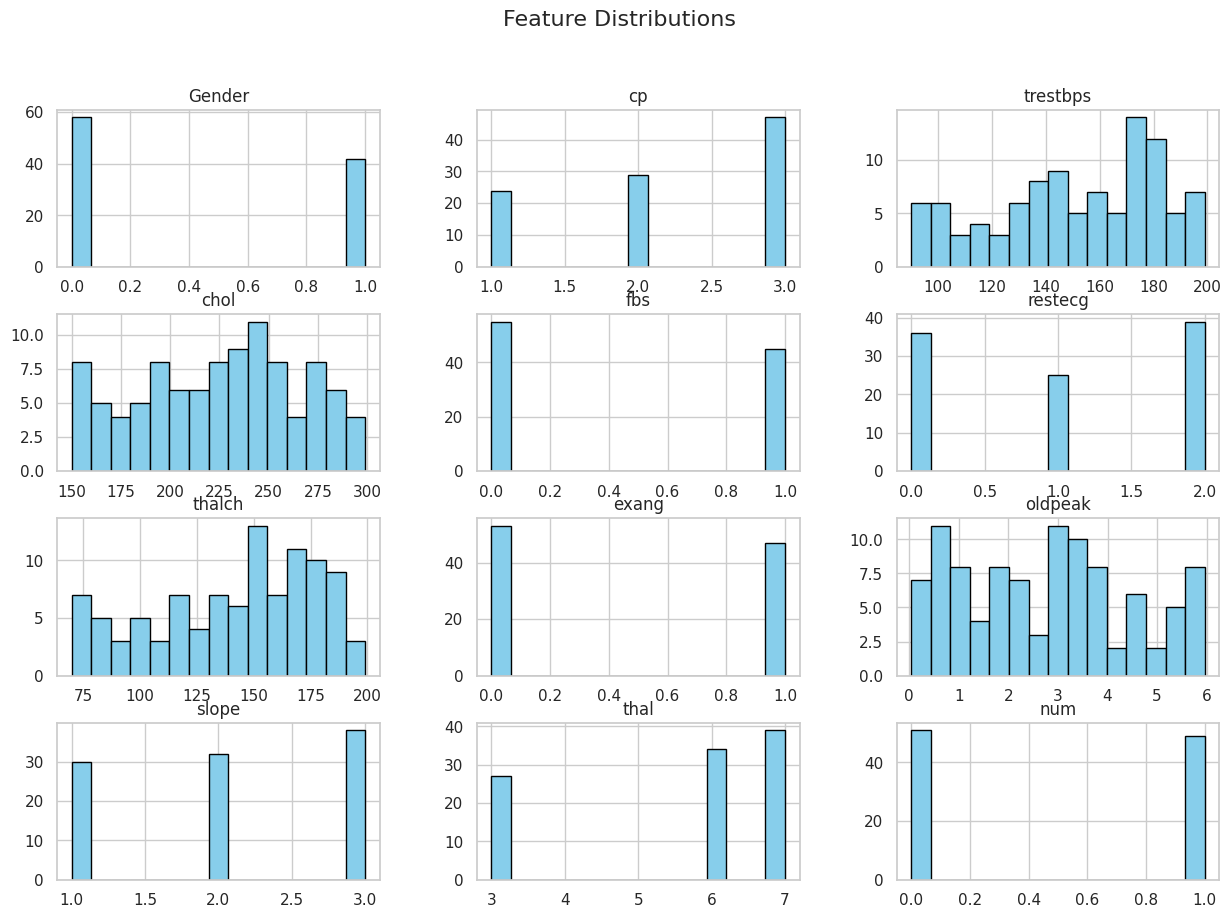

In [12]:
# We loop through each column and plot a histogram to observe the distribution
# Histograms help us understand the spread and skew of numerical features

# Set the plot style and size
sns.set(style="whitegrid")
synthetic_data.hist(bins=15, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)  # Set a main title for all histograms
plt.show()

### Identifying outliers with boxplot

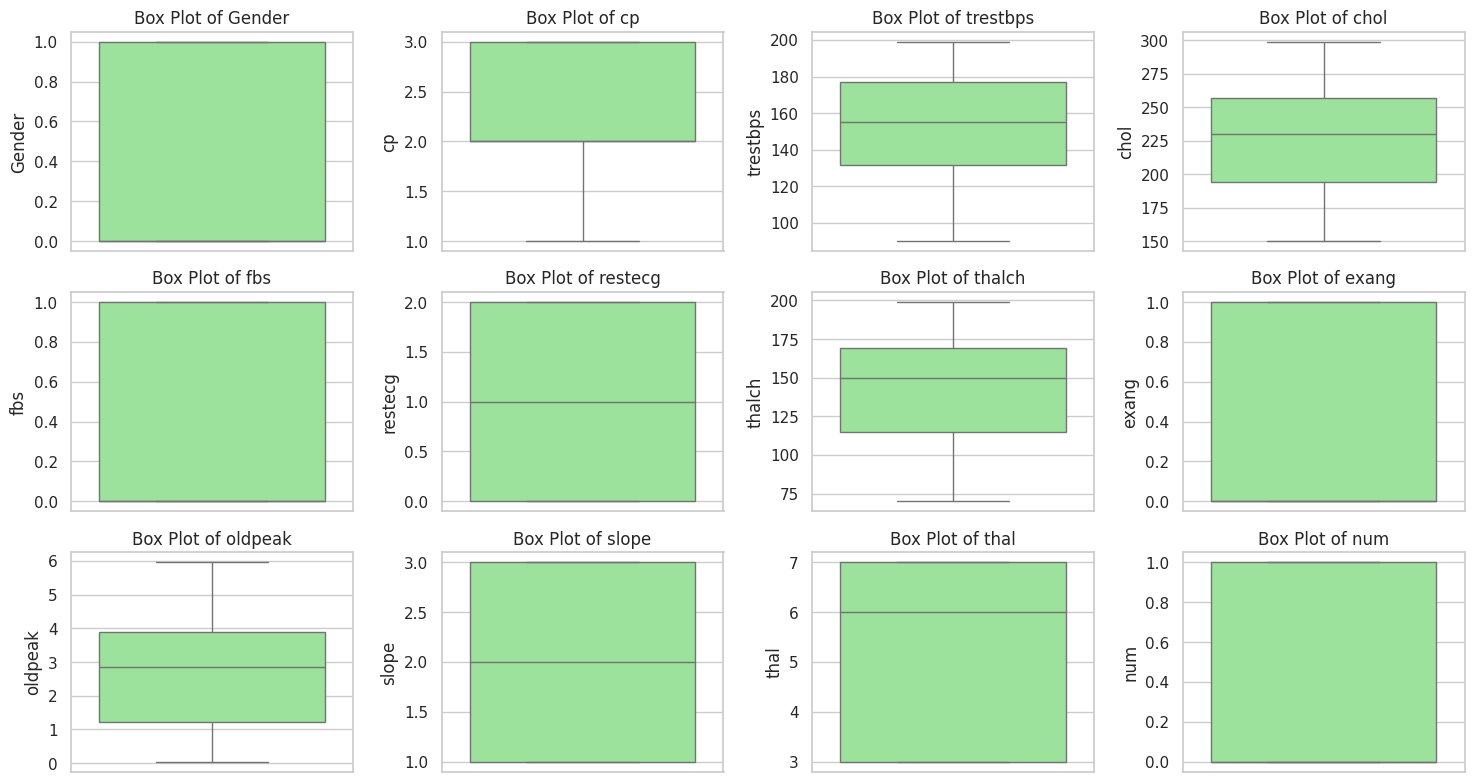

In [13]:
# Box plots visualize data spread and highlight potential outliers
# Each box plot shows the interquartile range (IQR) and data points beyond the IQR (potential outliers)
plt.figure(figsize=(15, 8))
for i, column in enumerate(synthetic_data.columns, 1):
    plt.subplot(3, 4, i)  # Arrange plots in a 3x4 grid
    sns.boxplot(data=synthetic_data[column], color="lightgreen")  # Box plot for each feature
    plt.title(f'Box Plot of {column}')  # Title for each box plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Analyzing feature correlations with correlation matrix

In [14]:
# Correlation matrices show relationships between features as a heatmap, ranging from -1 to 1
# Values closer to 1 indicate strong positive correlation; values closer to -1 indicate strong negative correlation
correlation_matrix = synthetic_data.corr()  # Calculate correlations between features

### Visualizing correlation matrix as heatmap

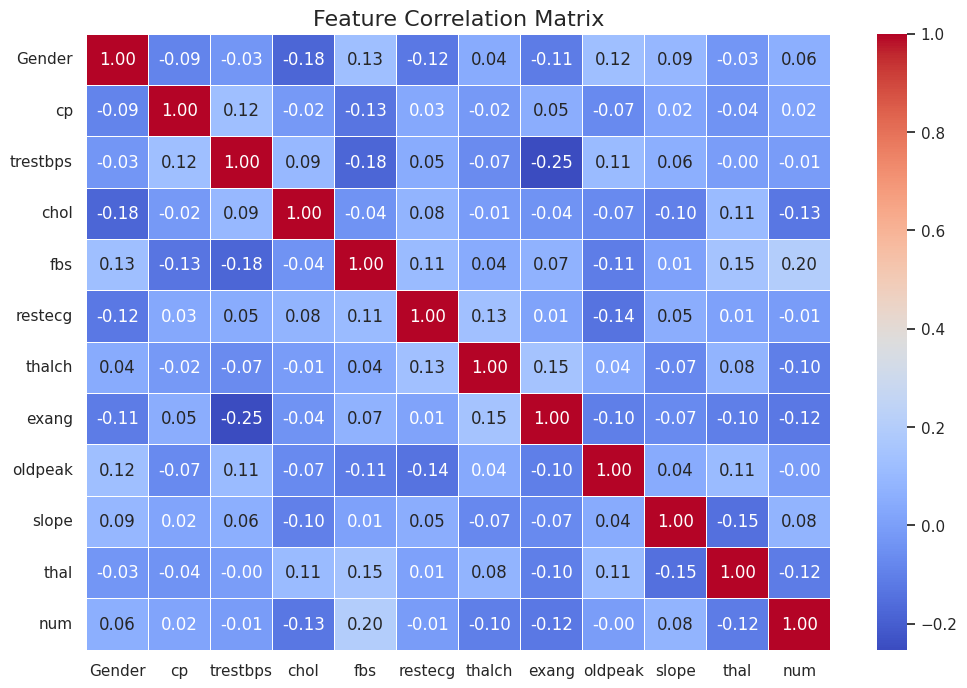

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")  # Display correlations
plt.title("Feature Correlation Matrix", fontsize=16)  # Title for the heatmap
plt.show()

# **Feature Engineering**

### Importing necessary libraries

In [16]:
from sklearn.preprocessing import StandardScaler  # Library for scaling features
from sklearn.preprocessing import OneHotEncoder  # Library for encoding categorical variables
from sklearn.compose import ColumnTransformer  # Helps in applying transformations to specific columns
from sklearn.pipeline import Pipeline  # To create a workflow that applies preprocessing steps in sequence

### Identifying categorical and numerical columns

In [17]:
# Here we separate categorical and numerical columns to apply appropriate transformations
# Categorical columns are typically those with discrete, non-numeric values that represent categories
categorical_cols = ['Gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']  # Columns with categories
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']  # Columns with continuous numeric values

### Setting up the transformer for preprocessing

In [18]:
# Transformer for numerical features: We apply StandardScaler to scale these features
# StandardScaler standardizes features by removing the mean and scaling to unit variance
numerical_transformer = StandardScaler()

In [19]:
# Transformer for categorical features: We use OneHotEncoder to convert categorical values to binary (0/1) columns
# OneHotEncoder creates a separate column for each unique category in each categorical column
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' avoids multicollinearity by dropping one category per feature

In [20]:
# Combine the numerical and categorical transformers
# ColumnTransformer applies the transformers to the specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Apply scaling to numerical columns
        ('cat', categorical_transformer, categorical_cols)  # Apply encoding to categorical columns
    ])

### Applying preprocessing pipeline

In [21]:
# We use .fit_transform() to apply the transformations and return a transformed NumPy array
# This line prepares the dataset for machine learning models
processed_data = preprocessor.fit_transform(synthetic_data)

In [22]:
# Convert the processed data back to a DataFrame for readability
# Here, we get feature names for one-hot encoded categorical columns from the encoder
# Numerical feature names are directly added, so we merge them into a final DataFrame
processed_data = pd.DataFrame(processed_data, columns=[
    *numerical_cols,  # Add the original numerical column names
    *preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)  # Add encoded column names
])

In [23]:
# Display the first few rows of the transformed dataset
# This helps verify that all transformations were applied correctly
processed_data.head()

,trestbps,chol,thalch,oldpeak,Gender_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6,thal_7
0,1.172520,-1.198387,-1.179919,0.041052,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,-0.068588,1.300274,0.159630,-0.101440,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.682609,1.276015,0.634053,1.766301,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.453984,-0.300810,0.829404,-1.098865,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.231891,0.354179,-1.989230,0.246503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Decision Tree Classification**

### Importing necessary libraries

In [24]:
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report  # Performance metrics

### Defining features and target variable

In [25]:
# Here, we separate the target column 'num' (representing heart disease presence) from the features
X = processed_data  # All columns except the target are used as features
y = synthetic_data['num']  # The 'num' column is the target, indicating heart disease presence (1) or absence (0)

### Splitting dataset into training and testing sets

In [26]:
# We use an 80-20 split (80% for training, 20% for testing) to train and evaluate the model on separate data
# random_state ensures reproducibility; stratify=y maintains the target's distribution across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Initializing Decision Tree Classification

In [27]:
# We create an instance of DecisionTreeClassifier with default parameters
# Decision trees are interpretable and flexible models that work well on structured data
model = DecisionTreeClassifier(random_state=42)  # random_state for consistent results

### Training model on training data

In [28]:
# We use .fit() to train the Decision Tree model on the training data (X_train and y_train)
# This allows the model to learn the relationship between features and the target variable
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Making predictions on test set

In [29]:
# Using .predict(), we generate predictions on the test data (X_test)
# These predictions will be compared against the actual target values in y_test
y_pred = model.predict(X_test)

### Evaluting model using various performance metrics

In [30]:
# Accuracy measures the percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)

In [31]:
# Precision measures the percentage of true positives out of all positive predictions
precision = precision_score(y_test, y_pred)

In [32]:
# Recall (sensitivity) measures the percentage of true positives out of all actual positives
recall = recall_score(y_test, y_pred)

In [33]:
# F1 Score is the harmonic mean of precision and recall, balancing both
f1 = f1_score(y_test, y_pred)

In [34]:
# ROC-AUC (Receiver Operating Characteristic - Area Under Curve) evaluates the tradeoff between true positives and false positives
# Higher AUC values indicate better model performance
roc_auc = roc_auc_score(y_test, y_pred)

In [35]:
# Print evaluation metrics
print(f"Model Performance Metrics:\n")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Performance Metrics:

Accuracy: 0.45
Precision: 0.44
Recall: 0.40
F1 Score: 0.42
ROC-AUC Score: 0.45


### Displaying classification report for detailed metrics

In [36]:
# The classification report shows precision, recall, F1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



# **Hyperparameter Tuning**

### Importing necessary library

In [37]:
from sklearn.model_selection import GridSearchCV  # For systematic tuning of hyperparameters

### Defining hyperparameter grid

In [38]:
# We create a dictionary where each key is a hyperparameter and its value is a list of settings to try
# The hyperparameters we'll tune are:
# - max_depth: maximum depth of the tree to prevent overfitting
# - min_samples_split: minimum number of samples needed to split an internal node
# - criterion: function to measure the quality of a split ('gini' or 'entropy')
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Experiment with unlimited depth and specific depths
    'min_samples_split': [2, 5, 10, 15],  # Adjust minimum samples required for a split
    'criterion': ['gini', 'entropy']  # Use both Gini and Entropy criteria for split quality
}

### Initializing GridSearchCV with the Decision Tree Classifier and hyperparameter grid

In [39]:
# GridSearchCV tests all possible combinations of parameters to find the best model configuration
# - estimator: model to optimize (DecisionTreeClassifier in our case)
# - param_grid: dictionary of hyperparameters to test
# - cv: number of cross-validation folds to use for reliability; we use 5-fold cross-validation
# - scoring: metric to evaluate the model; we use 'accuracy' here, but others could be used as needed
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)  # n_jobs=-1 allows using all processors for faster computation

### Fitting GridSearchCV to training data

In [40]:
# We fit the grid search on the training set to find the best combination of hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

### Retrieving the best hyperparameters and the corresponding model performance

In [41]:
# After fitting, GridSearchCV provides the best parameters and best score for the chosen metric
best_params = grid_search.best_params_  # The combination of hyperparameters with the highest accuracy
best_score = grid_search.best_score_  # Cross-validated accuracy of the best model

In [42]:
# Print out the best parameters and their cross-validation score
print("Best Hyperparameters:\n", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Hyperparameters:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.72


### Evaluating tuned model on test set

In [43]:
# After identifying the best hyperparameters, we can directly use the best estimator from GridSearchCV to make predictions
# This tuned model is already trained on the training data
best_model = grid_search.best_estimator_  # Extract the best model found in the grid search
y_pred_tuned = best_model.predict(X_test)  # Generate predictions on the test set with the tuned model

### Calculating and printing evaluation metrics for tuned model

In [44]:
# This allows us to see how the optimized model performs on unseen test data
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

In [45]:
print(f"\nTuned Model Performance on Test Set:\n")
print(f"Accuracy: {accuracy_tuned:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1 Score: {f1_tuned:.2f}")
print(f"ROC-AUC Score: {roc_auc_tuned:.2f}")


Tuned Model Performance on Test Set:

Accuracy: 0.35
Precision: 0.33
Recall: 0.30
F1 Score: 0.32
ROC-AUC Score: 0.35


# **Model Evaluation and Analysis**

### Importing necessary libraries

In [46]:
from sklearn import tree  # For visualizing the Decision Tree
import matplotlib.pyplot as plt  # For plotting visualizations

### Analyzing the performance of tuned Decision Tree Model

In [48]:
# Here we display the performance metrics obtained from Task 5 to understand the model's strengths and weaknesses
print("Model Evaluation on Test Data with Tuned Hyperparameters:\n")
print(f"Accuracy: {accuracy_tuned:.2f}")  # Accuracy of the model on the test set
print(f"Precision: {precision_tuned:.2f}")  # Precision indicates correctness of positive predictions
print(f"Recall: {recall_tuned:.2f}")  # Recall measures how well the model identifies positives
print(f"F1 Score: {f1_tuned:.2f}")  # F1 score balances precision and recall for overall performance
print(f"ROC-AUC Score: {roc_auc_tuned:.2f}")  # AUC measures the model's ability to distinguish between classes

# These metrics provide insights:
# - High accuracy, precision, recall, and F1 score indicate strong performance
# - ROC-AUC close to 1 shows good discrimination between classes (0 and 1)

Model Evaluation on Test Data with Tuned Hyperparameters:

Accuracy: 0.35
Precision: 0.33
Recall: 0.30
F1 Score: 0.32
ROC-AUC Score: 0.35


### Visualizing structure of Decision Tree

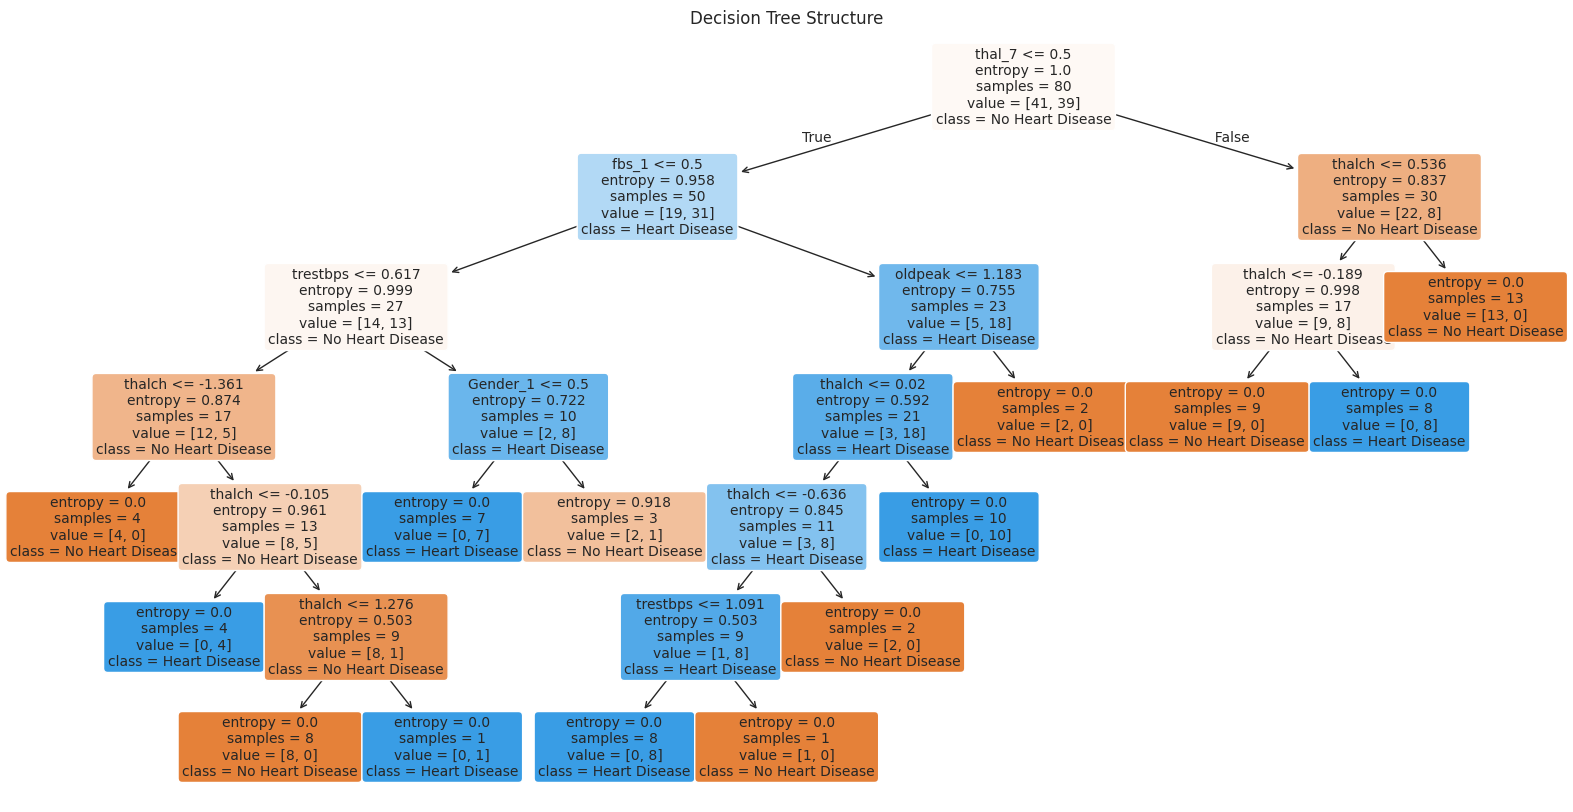

In [50]:
# Visualizing the tree helps understand the decision rules that the model uses to make predictions
plt.figure(figsize=(20, 10))  # Set the figure size for clear visualization
tree.plot_tree(best_model,
               feature_names=processed_data.columns,  # Provide feature names for context
               class_names=['No Heart Disease', 'Heart Disease'],  # Set class names for clarity
               filled=True,  # Use colors to indicate class splits
               rounded=True,  # Round corners of nodes for better readability
               fontsize=10)  # Set font size for labels
plt.title("Decision Tree Structure")  # Add a title to the plot
plt.show()  # Display the tree structure

# The tree visualization shows decision points, feature thresholds, and leaf nodes.
# Each node's color intensity represents the predicted class probability (stronger color = higher confidence).

### Identifying important features using feature importance scores

In [51]:
# The feature_importances_ attribute provides scores indicating each feature's contribution to model predictions
feature_importances = best_model.feature_importances_  # Get feature importance scores from the best model

In [52]:
# Create a DataFrame for better readability, pairing feature names with importance scores
importances_df = pd.DataFrame({
    'Feature': processed_data.columns,  # Names of the features
    'Importance': feature_importances  # Corresponding importance scores
}).sort_values(by='Importance', ascending=False)  # Sort features by importance (descending order)

In [53]:
# Display the feature importances to understand which features are most influential in predictions
print("\nFeature Importances:\n", importances_df)


Feature Importances:
       Feature  Importance
2      thalch    0.619781
0    trestbps    0.122080
14     thal_7    0.090179
3     oldpeak    0.064092
4    Gender_1    0.057822
7       fbs_1    0.046046
1        chol    0.000000
5        cp_2    0.000000
6        cp_3    0.000000
8   restecg_1    0.000000
9   restecg_2    0.000000
10    exang_1    0.000000
11    slope_2    0.000000
12    slope_3    0.000000
13     thal_6    0.000000


### Visualizing feature importance with bar plot

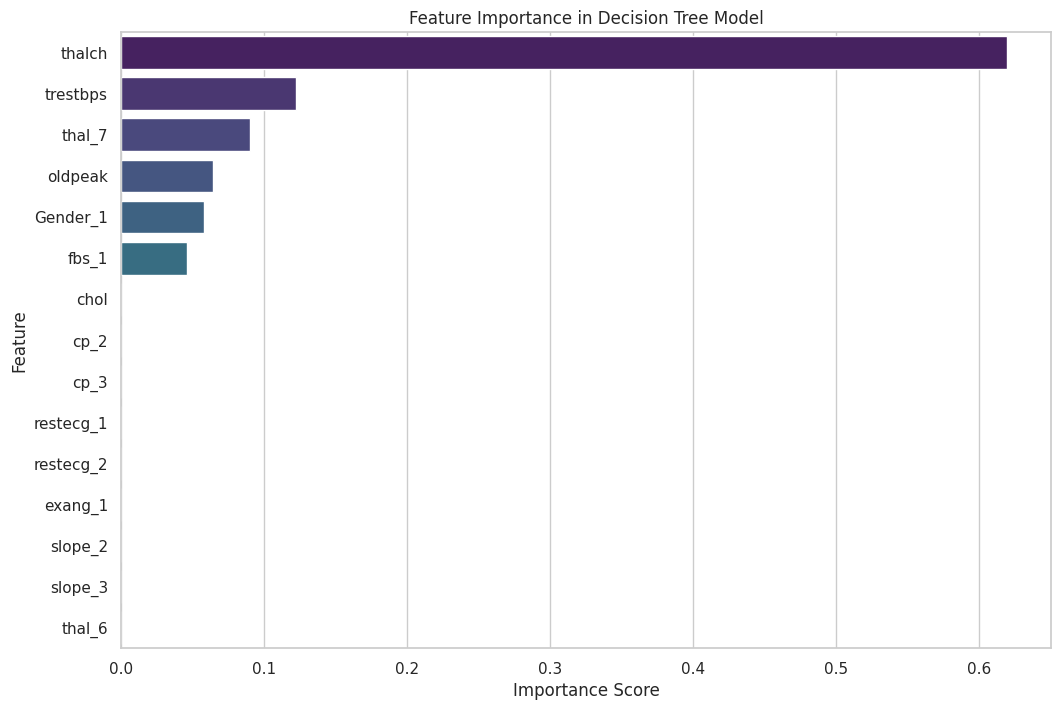

In [55]:
# Plotting feature importance helps easily identify the top features used by the Decision Tree
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, hue='Feature', dodge=False, palette="viridis")  # Horizontal bar plot with `hue` specified
plt.title("Feature Importance in Decision Tree Model")  # Title for the plot
plt.xlabel("Importance Score")  # Label for x-axis
plt.ylabel("Feature")  # Label for y-axis
plt.legend([],[], frameon=False)  # Remove the legend since we don't need it for single category
plt.show()  # Display the feature importance plot

# The bar plot ranks features by their importance, showing which features the Decision Tree relied on most.
# Highly ranked features significantly influence the model's decisions and may represent critical indicators in the dataset.

# **Interview Questions**

Q1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters in Decision Tree models include **max_depth**, **min_samples_split**, **min_samples_leaf**, and **criterion**, each affecting model performance and generalization. max_depth controls tree depth, with deeper trees capturing complex patterns but risking overfitting, while shallower trees may underfit. min_samples_split and min_samples_leaf set thresholds for node splits and leaf size, where higher values simplify the model and reduce overfitting risk, and lower values allow more flexibility but may overfit. The criterion (usually Gini or Entropy) influences split quality, with both generally yielding similar outcomes. Tuning these hyperparameters helps balance accuracy and generalization, adapting the model to fit data patterns without capturing noise.

Q2.What is the difference between the Label encoding and One-hot encoding?

Label encoding and One-hot encoding are techniques to convert categorical data into numerical format for machine learning models. Label encoding assigns each unique category a distinct integer, making it compact but potentially introducing unintended ordinal relationships, where higher numbers might imply ranking or importance. In contrast, One-hot encoding creates a binary vector for each category, with a 1 for the present category and 0s for others, ensuring no implicit ordinal relationship. While Label encoding is memory-efficient and works well for ordinal data, One-hot encoding avoids introducing order bias, making it more suitable for nominal (non-ordinal) categorical variables.